# **Лабораторная работа № 7.**
### по курсу «Нейроинформатика»
## **Тема: Автоассоциативные сети с узким горлом**



> Студент: Овечкин В.А.

> Группа: М8О-408Б-18

> Преподаватель: Аносова Н.П.

> Оценка:

## **Цель работы**: 
Исследование свойств автоассоциативных сетей с узким горлом,
алгоритмов обучения, а также применение сетей для выполнения линейного и нелинейного
анализа главных компонент набора данных.

## **Постановка задачи:**

1. Использовать автоассоциативную сеть с узким горлом для отображения набора данных,
выделяя первую главную компоненту данных.
2. Использовать автоассоциативную сеть с узким горлом для аппроксимации кривой на плоскости, выделяя первую нелинейную главную компоненту данных.
3. Применить автоассоциативную сеть с узким горлом для аппроксимации пространственной
кривой, выделяя старшие нелинейные главные компоненты данных.


## **Вариант** :
Для этапа 1


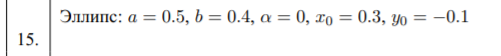


Для этапа 2



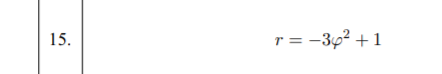

# Листинг кода

In [ ]:
!pip install pyrenn
!pip install neupy
!pip install neurolab

import pyrenn
from matplotlib import pyplot as plt
import math
import numpy as np
import neurolab as nl
import seaborn as sns
import random
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D

  Created wheel for pyrenn: filename=pyrenn-0.1-py3-none-any.whl size=9257 sha256=21af37131eb8bc8f916a7c32530d06f8425deb185e5b734fc8f5f00ca18d21df
  Stored in directory: /root/.cache/pip/wheels/00/36/ed/55abd022626413ad5e39d84b25cdd487f4ee8b38ba59e5aa29
Successfully built pyrenn
     |████████████████████████████████| 226 kB 5.3 MB/s 
     |████████████████████████████████| 92.7 MB 30 kB/s 
     |████████████████████████████████| 367 kB 67.5 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
     |████████████████████████████████| 3.2 MB 60.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing 

In [ ]:
a = 0.5
b = 0.4
alpha = 0
x0 = 0.3
y0 = -0.1

In [ ]:
def f(t):
    return a * np.cos(t + alpha) + x0

def g(t):
    return b * np.sin(t) + y0

In [ ]:
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / 0.025), endpoint = True) 

x = f(t)
y = g(t)

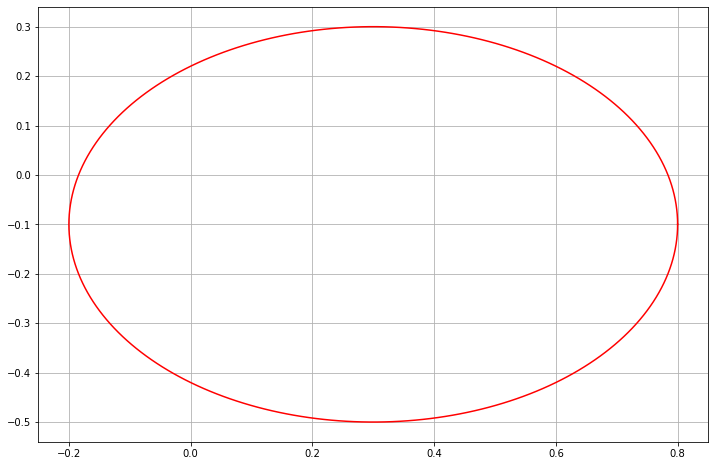

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'red')
plt.grid(True)
plt.show()

In [ ]:
NN = pyrenn.CreateNN([1, 2, 1])
NN = pyrenn.train_LM(x, y, NN, E_stop = 1e-5, k_max = 100)

Maximum number of iterations reached


In [ ]:
predicted = pyrenn.NNOut(x, NN)

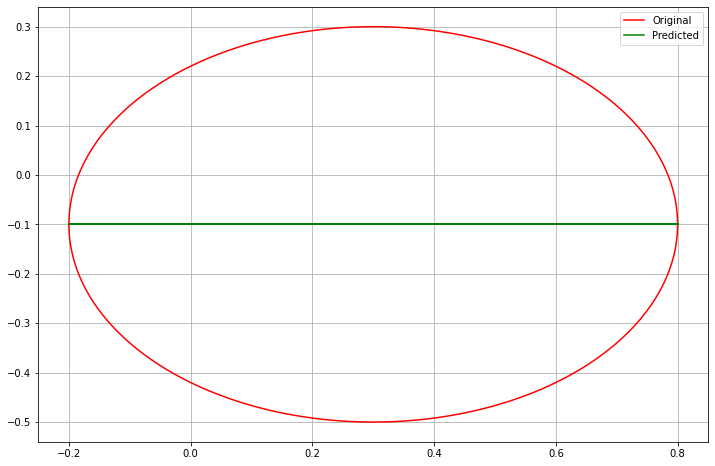

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'red', label = "Original")
plt.plot(x, predicted, 'green', label = "Predicted")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
phi = np.linspace(0, 2 * np.pi, int(2 * np.pi / 0.025), endpoint=True)

r = -3 * phi * phi +1
x, y = r * np.cos(phi), r * np.sin(phi)

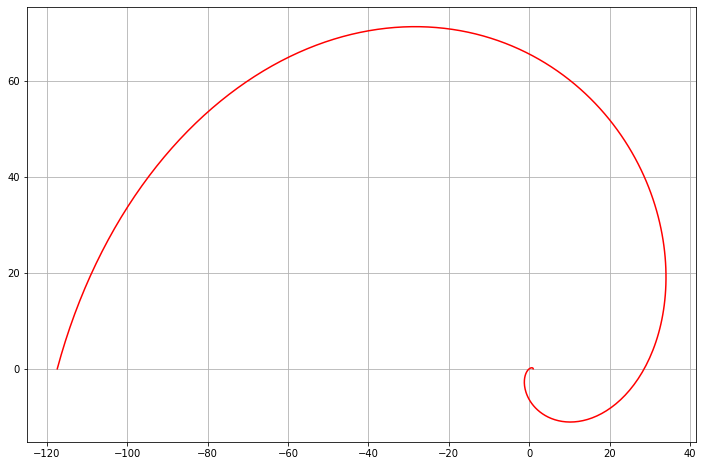

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'red')
plt.grid(True)
plt.show()

In [ ]:
NN2 = pyrenn.CreateNN([1, 10, 1,  10, 1])

In [ ]:
NN2 = pyrenn.train_LM(x, y, NN2, E_stop=1e-5, k_max=2000)

Maximum number of iterations reached


In [ ]:
predicted = pyrenn.NNOut(x, NN2)

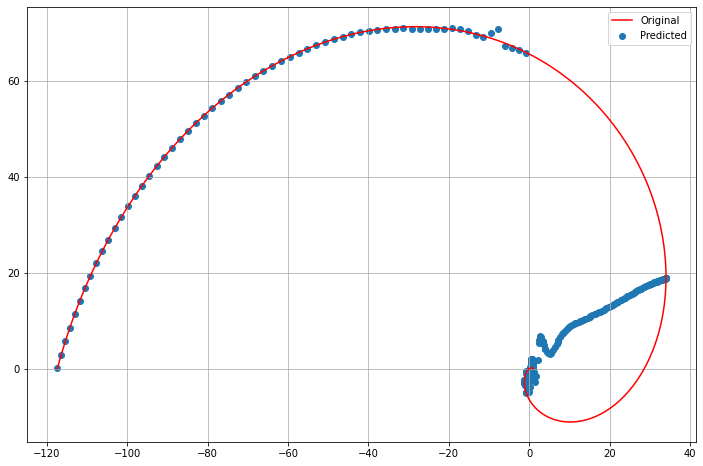

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'red', label = "Original")
plt.scatter(x, predicted, label = "Predicted")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
z = phi

NN3 = pyrenn.CreateNN([2, 10, 2,  10, 1])

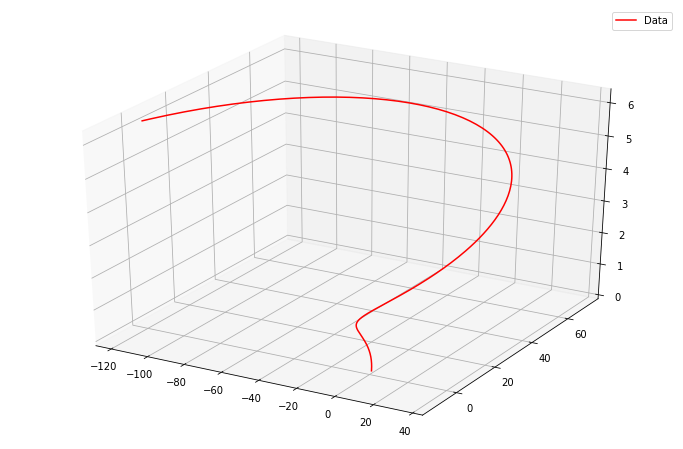

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')

ax.plot(x, y, z, color = 'red', label='Data')
ax.legend()

plt.show()


In [ ]:
NN3 = pyrenn.train_LM(np.array([x, z]), y, NN3, E_stop=1e-5, k_max=1000)

Termination Error reached


In [ ]:
predicted = pyrenn.NNOut(np.array([x, z]), NN3)

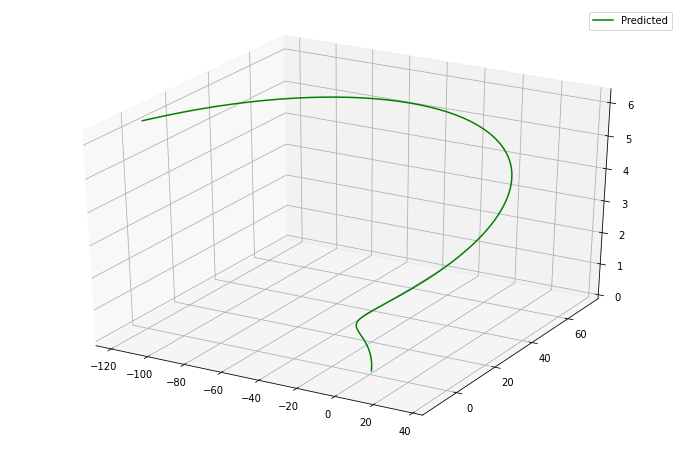

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')


ax.plot(x, predicted, z, color = 'green', label='Predicted')
ax.legend()

plt.show()